# *Car Price Prediction With Machine Learning*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

## *Import the DataSet*

In [2]:
df = pd.read_csv(r"C:\Users\rk991\OneDrive\Desktop\Rahul\Oasis Internship\car price prdiction with machine learning\car data.csv")

## *Take the look of the DataSet*

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

## *Taking the imformation about the Data*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## *Now checking the missing values*

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

## *Checking the Distribution of catagorical data*

In [8]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())
print(df.Owner.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Owner
0    290
1     10
3      1
Name: count, dtype: int64


## *Ploting the bar graph*

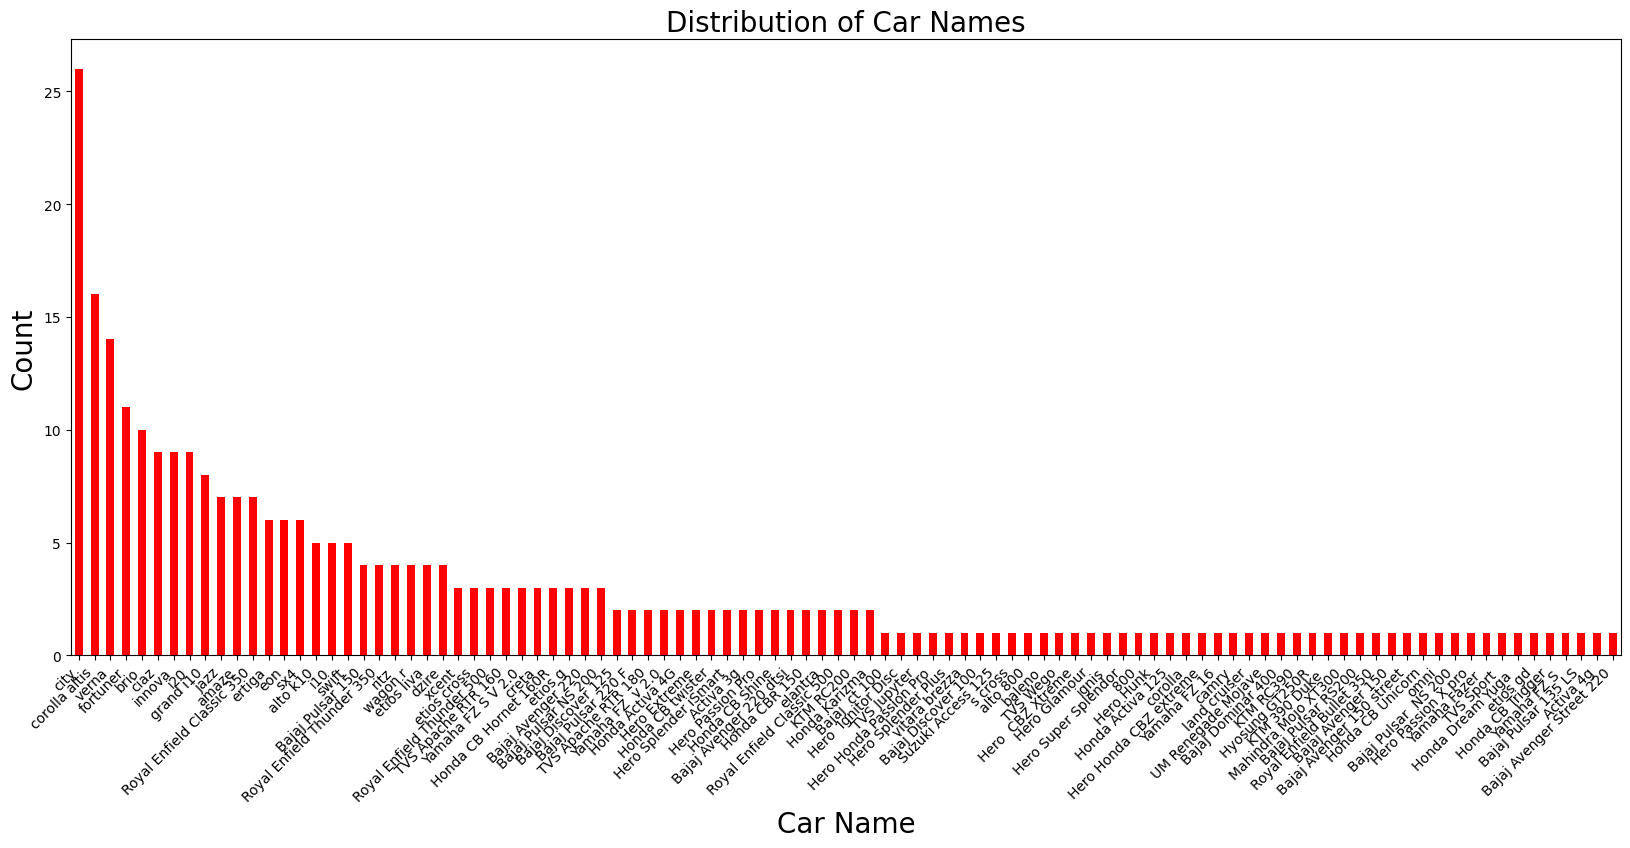

In [9]:
df.rename(columns = {'Driven_kms':'kms_Driven', 'Selling_type':'Seller_Type'}, inplace = True) 
car_count = df['Car_Name'].value_counts()
plt.figure(figsize = (20,8))
car_count.plot(kind = 'bar', color = 'red')
plt.title("Distribution of Car Names", size = 20)
plt.xlabel("Car Name", size = 20)
plt.ylabel("Count", size = 20)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

## *Finding the Mean of Selling_Price, Present_Price and Driven_Kms*

In [10]:
df_car  = df.groupby("Car_Name").agg({"Selling_Price" : "mean", "Present_Price" : "mean", "kms_Driven": "mean"}).reset_index()

In [11]:
df_car

,Car_Name,Selling_Price,Present_Price,kms_Driven
0,800,0.350000,2.280000,127000.000000
1,Activa 3g,0.310000,0.530000,250250.000000
2,Activa 4g,0.400000,0.510000,1300.000000
3,Bajaj ct 100,0.180000,0.320000,35000.000000
4,Bajaj Avenger 150,0.750000,0.800000,7000.000000
...,...,...,...,...
93,sx4,3.158333,8.066667,50740.000000
94,verna,6.107857,9.328571,42747.285714
95,vitara brezza,9.250000,9.830000,2071.000000
96,wagon r,2.512500,4.450000,40644.750000


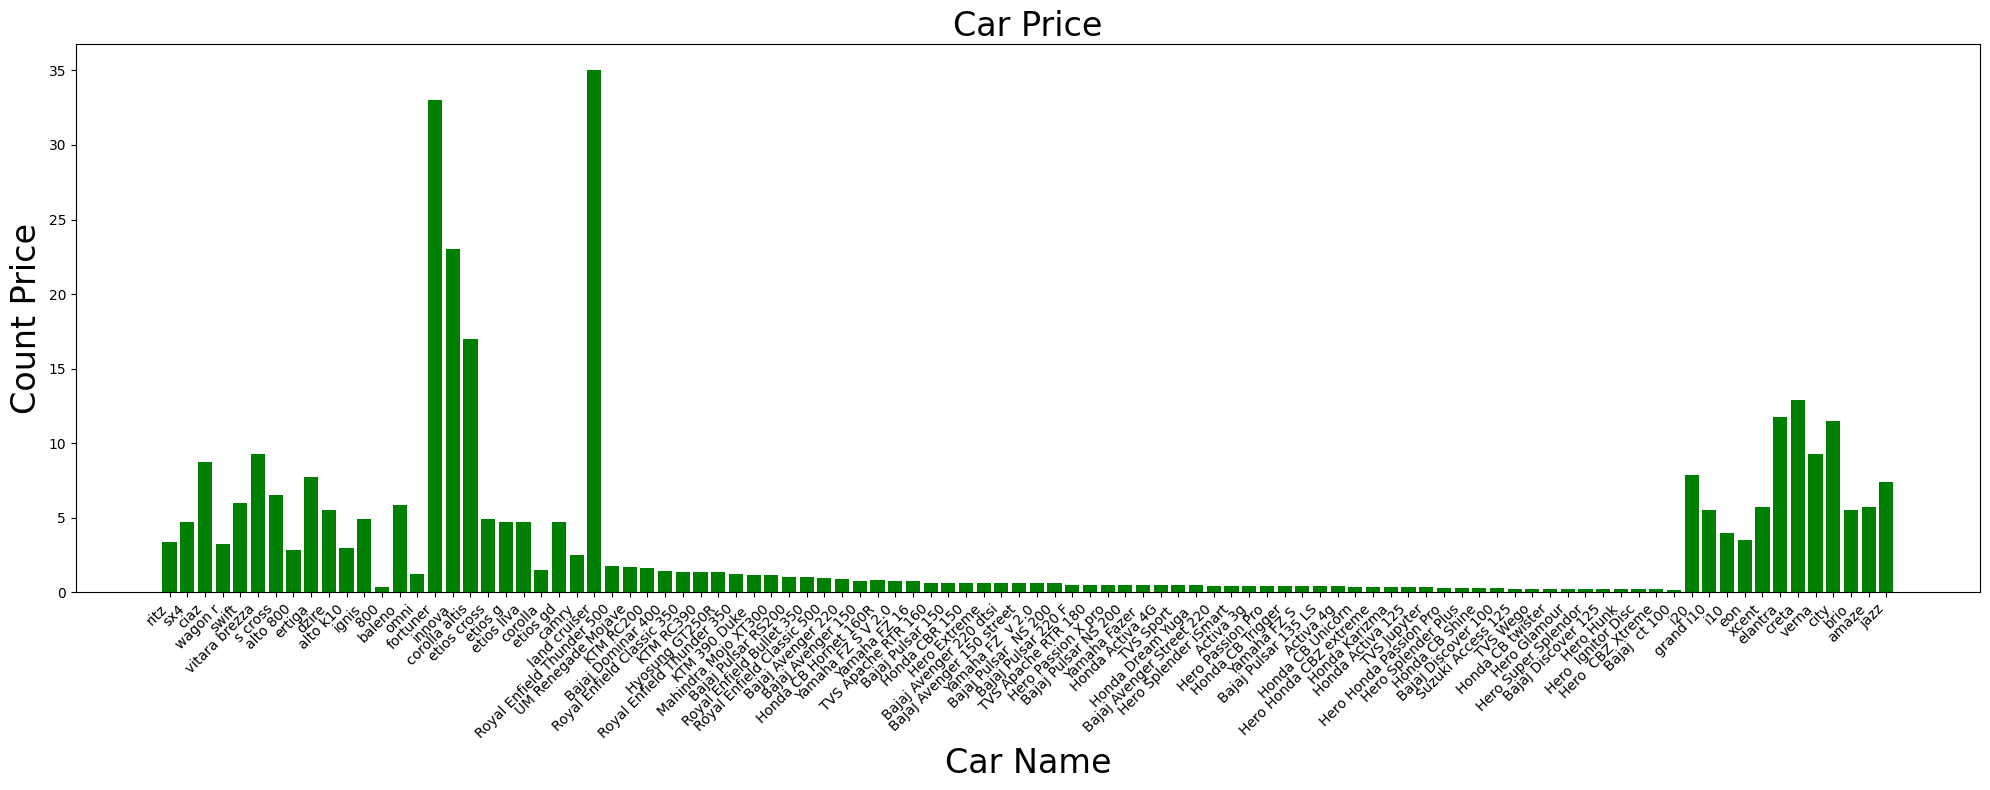

In [12]:
plt.figure(figsize = (20,8))
plt.bar(df['Car_Name'], df['Selling_Price'], color = 'green')
plt.title("Car Price", size = 24)
plt.xlabel("Car Name", size = 24)
plt.ylabel("Count Price", size = 24)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()

## *Now Checking the outliers by Ploting the Box Plot of Selling Price*

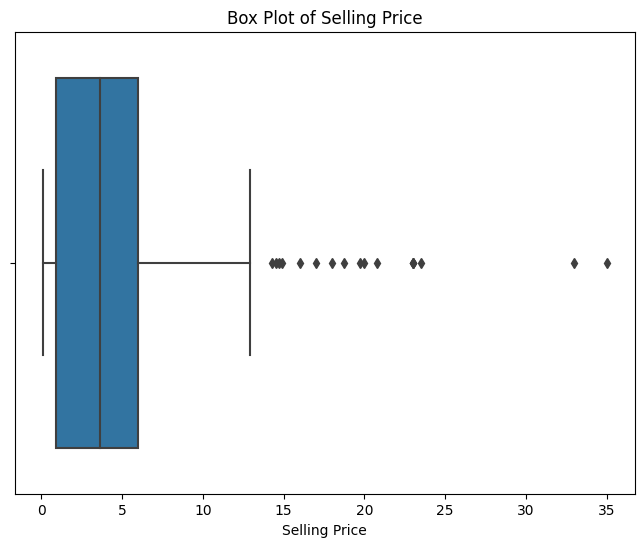

In [13]:
plt.figure(figsize = (8,6))
sns.boxplot(x = df['Selling_Price'])

plt.xlabel("Selling Price")
plt.title("Box Plot of Selling Price")

plt.show()

In [14]:
df = df.sort_values(by = 'Selling_Price', ascending = False).reset_index()

In [15]:
df.head()

,index,Car_Name,Year,Selling_Price,Present_Price,kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,86,land cruiser,2010,35.0,92.60,78000,Diesel,Dealer,Manual,0
1,64,fortuner,2017,33.0,36.23,6000,Diesel,Dealer,Automatic,0
2,63,fortuner,2015,23.5,35.96,47000,Diesel,Dealer,Automatic,0
3,82,innova,2017,23.0,25.39,15000,Diesel,Dealer,Automatic,0
4,51,fortuner,2015,23.0,30.61,40000,Diesel,Dealer,Automatic,0


## *Removing the Outliers*

In [16]:
df = df[3:].reset_index()

In [17]:
df.head()

,level_0,index,Car_Name,Year,Selling_Price,Present_Price,kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3,82,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
1,4,51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
2,5,93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
3,6,96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
4,7,59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0


In [18]:
df.drop(['level_0', 'index'], axis = 1, inplace = True)

In [19]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,innova,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
1,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
2,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
3,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
4,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       298 non-null    object 
 1   Year           298 non-null    int64  
 2   Selling_Price  298 non-null    float64
 3   Present_Price  298 non-null    float64
 4   kms_Driven     298 non-null    int64  
 5   Fuel_Type      298 non-null    object 
 6   Seller_Type    298 non-null    object 
 7   Transmission   298 non-null    object 
 8   Owner          298 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.1+ KB


## *Checking the value counts of each categorical column*

In [21]:
object = ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
for names in object:
    count = df[names].value_counts()
    print(str(names))
    print(str(count))
    print('---------------------------------------------------------------')

Car_Name
Car_Name
city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                     9
                            ..
Bajaj Avenger 150 street     1
alto 800                     1
Yamaha Fazer                 1
Honda Dream Yuga             1
Bajaj  ct 100                1
Name: count, Length: 97, dtype: int64
---------------------------------------------------------------
Fuel_Type
Fuel_Type
Petrol    239
Diesel     57
CNG         2
Name: count, dtype: int64
---------------------------------------------------------------
Seller_Type
Seller_Type
Dealer        192
Individual    106
Name: count, dtype: int64
---------------------------------------------------------------
Transmission
Transmission
Manual       260
Automatic     38
Name: count, dtype: int64
---------------------------------------------------------------


## ***We will use target encodinng for "Car_Name" column and one hot encoding for other categorical columns.***

In [22]:
target_encoder_column = "Car_Name"
encoder = ce.TargetEncoder(cols = [target_encoder_column])
df_encoded = encoder.fit_transform(df, df["Selling_Price"])

In [23]:
df_encoded

,Car_Name,Year,Selling_Price,Present_Price,kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6.493147,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0
1,7.437718,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
2,7.437718,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
3,6.493147,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
4,7.437718,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
...,...,...,...,...,...,...,...,...,...
293,3.820837,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0
294,3.805943,2010,0.16,0.51,33000,Petrol,Individual,Manual,0
295,3.801687,2011,0.15,0.57,35000,Petrol,Individual,Manual,1
296,3.806652,2007,0.12,0.58,53000,Petrol,Individual,Manual,0


## ***Save the Encoder***

In [24]:
import joblib
joblib.dump(encoder, r"C:\Users\rk991\OneDrive\Desktop\Rahul\Oasis Internship\car price prdiction with machine learning\Encoder.plk")

['C:\\Users\\rk991\\OneDrive\\Desktop\\Rahul\\Oasis Internship\\car price prdiction with machine learning\\Encoder.plk']

## *Now Encoding the Other Categorical Columns*

In [25]:

# Encoding the "Fule_Type" Column
df_encoded.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}} , inplace = True)

# Encoding the "Selling_Type" Column
df_encoded.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}} , inplace = True)

# Encoding the "Transmission" Column
df_encoded.replace({'Transmission' : {'Manual' : 0, 'Automatic' : 1}} , inplace = True)

df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [26]:
df_encoded.head()

,Car_Name,Year,Selling_Price,Present_Price,kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6.493147,2017,23.00,25.39,15000,1,0,1,0
1,7.437718,2015,23.00,30.61,40000,1,0,1,0
2,7.437718,2015,23.00,30.61,40000,1,0,1,0
3,6.493147,2016,20.75,25.39,29000,1,0,1,0
4,7.437718,2014,19.99,35.96,41000,1,0,1,0


## *Spliting the Dataset into Data and Target*

In [27]:
# x will we our Data and y will be our Target
x = df_encoded.drop(['Selling_Price'], axis = 1)
y = df_encoded['Selling_Price']

In [28]:
x.head()

,Car_Name,Year,Present_Price,kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6.493147,2017,25.39,15000,1,0,1,0
1,7.437718,2015,30.61,40000,1,0,1,0
2,7.437718,2015,30.61,40000,1,0,1,0
3,6.493147,2016,25.39,29000,1,0,1,0
4,7.437718,2014,35.96,41000,1,0,1,0


In [29]:
print(x)

     Car_Name  Year  Present_Price  kms_Driven  Fuel_Type  Seller_Type  \
0    6.493147  2017          25.39       15000          1            0   
1    7.437718  2015          30.61       40000          1            0   
2    7.437718  2015          30.61       40000          1            0   
3    6.493147  2016          25.39       29000          1            0   
4    7.437718  2014          35.96       41000          1            0   
..        ...   ...            ...         ...        ...          ...   
293  3.820837  2008           0.52      500000          0            1   
294  3.805943  2010           0.51       33000          0            1   
295  3.801687  2011           0.57       35000          0            1   
296  3.806652  2007           0.58       53000          0            1   
297  3.712253  2006           0.75       92233          0            1   

     Transmission  Owner  
0               1      0  
1               1      0  
2               1      0  
3  

In [30]:
print(y)

0      23.00
1      23.00
2      23.00
3      20.75
4      19.99
       ...  
293     0.17
294     0.16
295     0.15
296     0.12
297     0.10
Name: Selling_Price, Length: 298, dtype: float64


## *Now Training The Model*

## 1. *Using the Linear Regression*

In [31]:
#loading the linear regression model
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(x,y)

LinearRegression()

## *Evaluating the Linear Regression Model*

In [32]:
training_data_prediction = lin_reg_model.predict(x)

In [33]:
error_score = metrics.r2_score(y, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8773063467356178


## *Visualizing the actual and predicted prices*

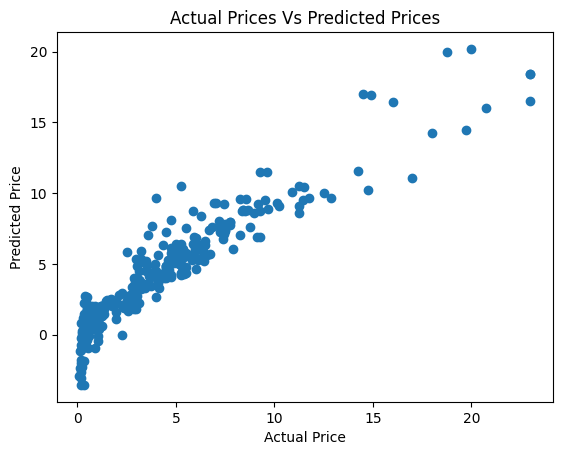

In [34]:
plt.scatter(y, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

## 2. *Now Using Lasso Regression*

In [35]:
# Loading the lasso regression model
from sklearn.linear_model import Lasso

lass_reg_model = Lasso()

lass_reg_model.fit(x, y)

Lasso()

## *Evaluating the Lasso Regression Model*

In [36]:
training_data_prediction1 = lass_reg_model.predict(x)

In [37]:
error_score = metrics.r2_score(y, training_data_prediction1)
print("R Squared Erroe : ", error_score)

R Squared Erroe :  0.8443458327355938


## *Visualizing the Actual and Predicted Prices*

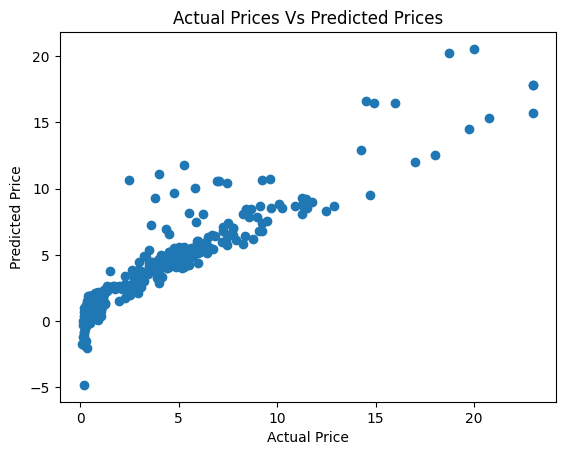

In [38]:
plt.scatter(y, training_data_prediction1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices Vs Predicted Prices")
plt.show()

## *3. Now Using the Decision tree.*

In [39]:
from sklearn.tree import DecisionTreeRegressor
desc_tree_model = DecisionTreeRegressor()

In [40]:
desc_tree_model.fit(x,y)

DecisionTreeRegressor()

## *Evaluating the Decision Tree Model*

In [41]:
training_data_prediction = desc_tree_model.predict(x)

In [42]:
error_score = metrics.r2_score(y, training_data_prediction)
print("R Squared Erroe : ", error_score)

R Squared Erroe :  1.0


## *Saving the Model*

In [43]:
joblib.dump(desc_tree_model, r"C:\Users\rk991\OneDrive\Desktop\Rahul\Oasis Internship\car price prdiction with machine learning\Desc_tree_model.pk1")

['C:\\Users\\rk991\\OneDrive\\Desktop\\Rahul\\Oasis Internship\\car price prdiction with machine learning\\Desc_tree_model.pk1']